# Проверка гипотез по увеличению выручки в интернет-магазине

## Описание проекта

### Данные:
- данные о гипотезах и их оценки по охвату, влиянию на пользователей, уверенности в гипотезе и по затратам ресурсов по 10-балльной шкале, 
- данные о заказах и посетителях интернет-магазина.


### Цели и задачи:
Необходимо выполнить приоритизацию гипотез и проанализировать результаты A/B-теста.


## [Часть 1.  Приоритизация гипотез](#1)
<a id="content_1">Содержание:</a>
1. [Предобработка данных](#preprocessing)
2. [Использование фреймворка ICE](#ICE)
3. [Использование фреймворка RICE](#ICE)
4. [Вывод](#conclusion)

## [Часть 2.  Анализ A/B-теста](#2)
<a id="content_2">Содержание:</a>
1. [Предобработка данных](#preprocessing_2)
2. [График кумулятивной выручки по группам](#cumulative_revenue)
3. [График кумулятивного среднего чека по группам](#cumulative_revenue_by_orders)
4. [График относительного изменения кумулятивного среднего чека группы B к группе A](#cumulative_revenue_by_orders_BA)
5. [График кумулятивной конверсии по группам](#cumulative_conversion)
6. [График относительного изменения кумулятивной конверсии группы B к группе A](#cumulative_conversion_BA)
7. [Точечный график количества заказов по пользователям](#scatter_orders)
8. [95-й и 99-й перцентили количества заказов на пользователя](#percentile_orders)
9. [Точечный график стоимостей заказов](#scatter_revenue)
10. [95-й и 99-й перцентили стоимости заказов](#percentile_revenue)
11. [Статистическая значимость различий в конверсии между группами по «сырым» данным](#stat_conversion)
12. [Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным](#stat_revenue)
13. [Статистическая значимость различий в конверсии между группами по «очищенным» данным](#stat_conversion_clean)
14. [Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным](#stat_revenue_clean)
15. [Вывод](#conclusion_2)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
import datetime as dt

## <a id="1">Часть 1.  Приоритизация гипотез</a>

### <a id="preprocessing">1. Предобработка данных</a>
[Вернуться к оглавлению](#content_1)

In [2]:
#читаем данные
hypothesis_data = pd.read_csv('C:/Users/liana/datasets/hypothesis.csv', sep = ',')

In [3]:
#меняем заголовки
hypothesis_data.columns = hypothesis_data.columns.str.lower()

In [4]:
hypothesis_data

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

### <a id="ICE">2. Использование фреймворка ICE</a>
[Вернуться к оглавлению](#content_1)

In [5]:
#добавляем расчет ICE к таблице
hypothesis_data['ice'] = hypothesis_data['impact'] * hypothesis_data['confidence'] / hypothesis_data['efforts']

In [6]:
hypothesis_data['ice'] = hypothesis_data['ice'].round(2)

In [7]:
hypothesis_ice = hypothesis_data.sort_values(by = 'ice', ascending = False)[['hypothesis', 'ice']]
hypothesis_ice.style.set_table_styles([dict(selector="th",props=[('max-width', '50px')])])

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.330000
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.330000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.120000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


### <a id="RICE">3. Использование фреймворка RICE</a>
[Вернуться к оглавлению](#content_1)

In [8]:
hypothesis_data['rice'] = hypothesis_data['reach'] * hypothesis_data['impact'] * hypothesis_data['confidence'] / hypothesis_data['efforts']

In [9]:
#добавляем расчет RICE к таблице
hypothesis_rice = hypothesis_data.sort_values(by = 'rice', ascending = False)[['hypothesis', 'rice']]
hypothesis_rice.style.set_table_styles([dict(selector="th",props=[('max-width', '50px')])])

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.000000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.000000


### <a id="conclusion">4. Вывод</a>
[Вернуться к оглавлению](#content_1)

В рассчете по ICE наибольшее количество баллов получили гипотезы под номерами 8, 0 и 7. В рассчете по RICE топ-3 гипотез - под номерами 7, 2 и 0. 
Топ-5 гипотез остались такими же, хоть и в измененном порядке. 
На первом месте оказалась гипотеза с наибольшим охватом.

## <a id="2">Часть 2. Анализ A/B-теста</a>

### <a id="preprocessing_2">1. Предобработка данных</a>
[Вернуться к оглавлению](#content_2)

In [10]:
#читаем данные по заказам
orders = pd.read_csv('C:/Users/liana/datasets/orders.csv', sep = ',')

In [11]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [12]:
#меняем заголовки
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [13]:
#читаем данные по посетителям
visitors = pd.read_csv('C:/Users/liana/datasets/visitors.csv', sep = ',')

In [14]:
visitors.info()
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [15]:
#приводим даты к нужному типу
orders['date'] = pd.to_datetime(orders['date'], format = '%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format = '%Y-%m-%d')

### <a id="cumulative_revenue">2. График кумулятивной выручки по группам</a>
[Вернуться к оглавлению](#content_2)

In [16]:
#создаем отдельные датафреймы по каждой группе
orders_a = orders[orders['group'] == 'A']
orders_b = orders[orders['group'] == 'B']

In [17]:
#считаем количество заказов и выручку за день для группы А
#считаем кумулятивное количество заказов и кумулятивную выручку для группы А

orders_a_daily = orders_a.groupby('date').agg({'revenue':'sum', 'transaction_id':'nunique'})
orders_a_daily_cumsum = orders_a_daily.agg({'revenue':'cumsum', 'transaction_id':'cumsum'}).reset_index()

In [18]:
#считаем количество заказов и выручку за день для группы В
#считаем кумулятивное количество заказов и кумулятивную выручку для группы В

orders_b_daily = orders_b.groupby('date').agg({'revenue':'sum', 'transaction_id':'nunique'})
orders_b_daily_cumsum  = orders_b_daily.agg({'revenue':'cumsum', 'transaction_id':'cumsum'}).reset_index()

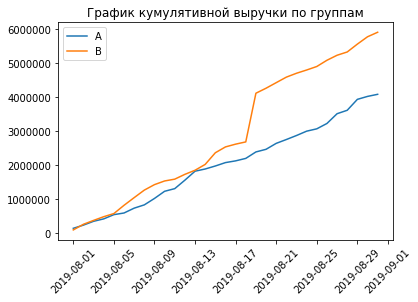

In [19]:
#строим график кумулятивной выручки по группам

plt.plot(orders_a_daily_cumsum['date'], orders_a_daily_cumsum['revenue'], label = 'A')
plt.plot(orders_b_daily_cumsum['date'], orders_b_daily_cumsum['revenue'], label = 'B')
plt.legend()
plt.title('График кумулятивной выручки по группам')
plt.xticks(rotation= 45)
plt.show()

#### Вывод:
До какого-то определенного времени кумулятивная выручка групп А и Б росла примерно одинаково, но потом произошел резкий скачок в группе Б, который говорит о возможном аномальном поведении (нетипично больша сумма заказа либо большое количество заказов).
Дальнейший темп роста выручки после аномального "скачка" в группе В также примерно одинаковый (линии почти параллельны).

### <a id="cumulative_revenue_by_orders">3. График кумулятивного среднего чека по группам</a>
[Вернуться к оглавлению](#content_2)

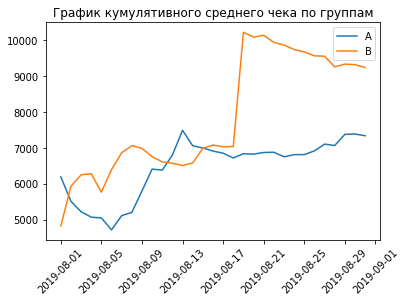

In [20]:
#строим график кумулятивного среднего чека

plt.plot(orders_a_daily_cumsum['date'], orders_a_daily_cumsum['revenue'] / orders_a_daily_cumsum['transaction_id'], label = 'A')
plt.plot(orders_b_daily_cumsum['date'], orders_b_daily_cumsum['revenue'] / orders_b_daily_cumsum['transaction_id'], label = 'B')
plt.legend()
plt.title('График кумулятивного среднего чека по группам')
plt.xticks(rotation = 45)
plt.show()

#### Вывод:
В группе В есть резкое увеличение кумулятивного среднего чека, которое вызвано аномальным поведением, а именно большой суммой заказа или заказов.
Возможно в группе А в начале теста тоже былы какие-то аномальные заказы, потому что на графике тоже есть резкие скачки.

### <a id="cumulative_revenue_by_orders_BA">4. График относительного изменения кумулятивного среднего чека группы B к группе A</a>
[Вернуться к оглавлению](#content_2)

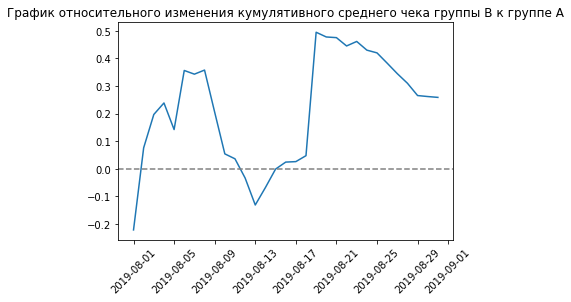

In [21]:
#строим график относительного измененеия кумулятивного среднего чека

plt.plot(orders_b_daily_cumsum['date'], 
         (orders_b_daily_cumsum['revenue'] / orders_b_daily_cumsum['transaction_id']) / 
         (orders_a_daily_cumsum['revenue'] / orders_a_daily_cumsum['transaction_id']) - 1)
plt.title('График относительного изменения кумулятивного среднего чека группы В к группе А')
plt.xticks(rotation=45)
plt.axhline(0, linestyle = '--', color = 'grey')
plt.show()

#### Вывод:
Кумулятивный средний чек группы В больше, чем кумулятивный средний чек группы А почти все время испытаний. Но есть резкие скачки, которые необходимо дополнительно исследовать.

### <a id="cumulative_conversion">5. График кумулятивной конверсии по группам</a>
[Вернуться к оглавлению](#content_2)

In [22]:
#добавляем столбец с кумулятивным количеством посетителей

orders_a_daily_cumsum = orders_a_daily_cumsum.merge(
    visitors[visitors['group'] == 'A'].agg({'date':'unique', 'visitors':'cumsum'}), on = 'date')

orders_b_daily_cumsum = orders_b_daily_cumsum.merge(
    visitors[visitors['group'] == 'B'].agg({'date':'unique', 'visitors':'cumsum'}), on = 'date')

In [23]:
#меняем названия столбцов

orders_a_daily_cumsum.columns = ['date', 'revenue', 'orders', 'visitors']
orders_b_daily_cumsum.columns = ['date', 'revenue', 'orders', 'visitors']

In [24]:
#считаем кумулятивную конверсию как кумулятивное количество заказов, деленное на кумулятивное количество посетителей

orders_a_daily_cumsum['conversion'] = orders_a_daily_cumsum['orders'] / orders_a_daily_cumsum['visitors']
orders_b_daily_cumsum['conversion'] = orders_b_daily_cumsum['orders'] / orders_b_daily_cumsum['visitors']

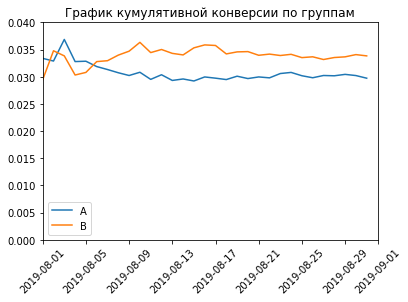

In [25]:
#строим график кумулятивной конверсии по группам в более мелком масштабе для наглядности

plt.plot(orders_a_daily_cumsum['date'], orders_a_daily_cumsum['conversion'], label = 'A')
plt.plot(orders_b_daily_cumsum['date'], orders_b_daily_cumsum['conversion'], label = 'B')
plt.legend()
plt.title('График кумулятивной конверсии по группам')
plt.xticks(rotation=45)
plt.axis([dt.datetime(2019,8,1), dt.datetime (2019,9,1), 0, 0.04]) 
plt.show()

#### Вывод:
В начале теста были колебания, но затем они выровнялись. Конверсия группы В выше, чем конверсия группы А.

### <a id="cumulative_conversion_BA">6. График относительного изменения кумулятивной конверсии группы B к группе A</a>
[Вернуться к оглавлению](#content_2)

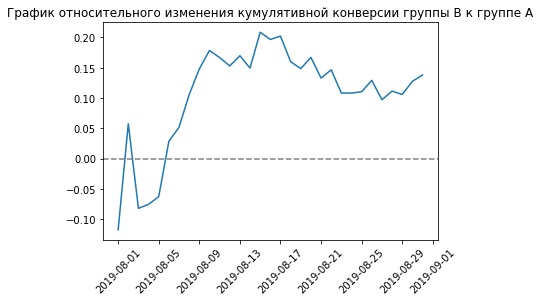

In [26]:
#строим график относительного изменения кумулятивной конверсии группы B к группе A

plt.plot(orders_b_daily_cumsum['date'], orders_b_daily_cumsum['conversion'] / orders_a_daily_cumsum['conversion'] - 1)
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xticks(rotation=45)
plt.axhline(0, linestyle = '--', color = 'grey')
plt.show()

#### Вывод:
В начале теста были колебания, но потом конверсия группы В выросла больше, чем на 10%, по сравнению с конверсией группы А.

### <a id="scatter_orders">7. Точечный график количества заказов по пользователям</a>
[Вернуться к оглавлению](#content_2)

In [27]:
#считаем количество заказов для каждого пользователя
#выбираем для group аггрегирующую функцию min, чтобы при наличии посетиителя в обеих группах, оставалась только группа А, 
#т.к. она меньше по размеру
orders_n = orders.groupby('visitor_id').agg({'transaction_id':'nunique', 'group':'min'}).reset_index()
orders_n.columns = ['visitor_id', 'orders_number', 'group']
orders_n.head()

,visitor_id,orders_number,group
0,5114589,1,B
1,6958315,1,B
2,8300375,2,A
3,11685486,1,A
4,39475350,1,B


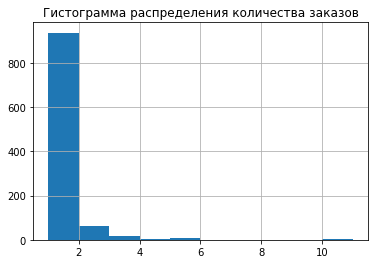

In [28]:
#строим гистограмму распределения количества заказов
orders_n['orders_number'].hist()
plt.title('Гистограмма распределения количества заказов')
plt.show()

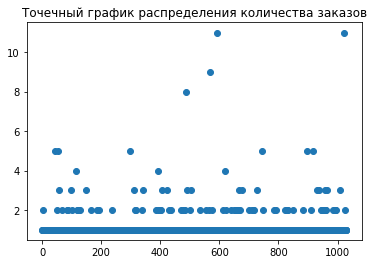

In [29]:
#строим точечный график
x_values = pd.Series(range(0, orders['visitor_id'].nunique()))
plt.scatter(x_values, orders_n['orders_number'])
plt.title('Точечный график распределения количества заказов')
plt.show()

In [30]:
orders_n['orders_number'].value_counts()

1     937
2      64
3      17
5       6
4       3
11      2
9       1
8       1
Name: orders_number, dtype: int64

#### Вывод:
Большинство пользователей (~91%) сделали 1(один) заказ.

### <a id="percentile_orders">8. 95-й и 99-й перцентили количества заказов на пользователя</a>
[Вернуться к оглавлению](#content_2)

In [31]:
#считаем перцентили через numpy
np.percentile(orders_n['orders_number'], [95, 97.5, 99])

array([2., 3., 4.])

#### Вывод:
95-й перцентиль равен двум, 99-й перцентиль равен 4. 
Примем, что аномальным количеством заказов будет значение, равное или больше 3.

### <a id="scatter_revenue">9. Точечный график стоимости заказов</a>
[Вернуться к оглавлению](#content_2)

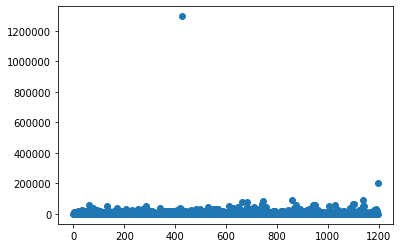

In [32]:
#строим точечный график распределения стоимости заказов

plt.scatter(orders.index, orders['revenue'])
plt.show()

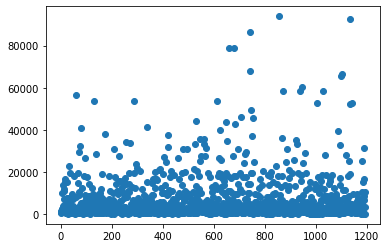

In [33]:
#строим точечный график распределения стоимости заказов для заказов меньше 200 тысяч (для наглядности)

x_values = pd.Series(range(0,len(orders[orders['revenue'] < 200000]['revenue'])))
plt.scatter(x_values, orders[orders['revenue'] < 200000]['revenue'])
plt.show()

#### Вывод:
Есть один заказ стоимостью больше 1,2 млн и еще один заказ стоимостью примерно в 200 тысяч, которые определенно сильно влияют на конверсию и средний чек.
На втором графике видно, что стоимость большинства заказов не превышает 20 тысяч.

### <a id="percentile_revenue">10. 95-й и 99-й перцентили стоимости заказов</a>
[Вернуться к оглавлению](#content_2)

In [34]:
#считаем перцентили
np.percentile(orders['revenue'], [95, 97.5, 99])

array([28000. , 39530. , 58233.2])

#### Вывод:
95-й перцентиль равен 28000, 99-й перцентиль равен 58233.2. 
Примем 40000 в качестве границы аномальных значений.

### <a id="stat_conversion">11. Статистическая значимость различий в конверсии между группами по «сырым» данным</a>
[Вернуться к оглавлению](#content_2)

In [35]:
#создаем список всех пользователей группы А с количеством сделанных заказов
sample_a = pd.concat(
    [orders_n[orders_n['group'] == 'A']['orders_number'], \
     pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum()\
                                  - len(orders_n[orders_n['group'] == 'A'])), name='orders')], axis = 0)

In [36]:
#создаем список всех пользователей группы В с количеством сделанных заказов
sample_b = pd.concat(
    [orders_n[orders_n['group'] == 'B']['orders_number'], \
     pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum()\
                                  - len(orders_n[orders_n['group'] == 'B'])), name='orders')], axis = 0)

Нулевая гипотеза:
конверсии группы А и группы В равны.

Альтернативная гипотеза: 
конверсии групп А и В отличаются.

In [37]:
#считаем статистическую значимость

a = 0.05
p_value = stats.mannwhitneyu(sample_a, sample_b)[1]

In [38]:
#считаем относительное различие конверсии
print('Относительный прирост конверсии группы B:', '{0:.3f}'.format(sample_b.mean() / sample_a.mean() - 1))

Относительный прирост конверсии группы B: -0.164


In [39]:
print('p-value =', '{0:.3f}'.format(p_value))
if p_value > a:
    print('Не отвергаем нулевую гиотпезу')
else:
    print('Отвергаем нулевую гиотпезу')

p-value = 0.281
Не отвергаем нулевую гиотпезу


### <a id="stat_revenue">12. Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным</a>
[Вернуться к оглавлению](#content_2)

Нулевая гипотеза: средний чек групп А и В одинаковый. 

Альтернативная гипотеза: средний чек групп А и В отличается.

In [40]:
#считаем статистическую значимость
p_value = stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1]

In [41]:
#считаем относительное различие среднего чека
print('Относительное различие среднего чека группы В:', '{0:.3f}'.format(orders[orders['group'] == 'B']['revenue'].mean() / 
                                                                    orders[orders['group'] == 'A']['revenue'].mean() - 1))

Относительное различие среднего чека группы В: 0.259


In [42]:
print('p-value =', '{0:.3f}'.format(p_value))
if p_value > a:
    print('Не отвергаем нулевую гиотпезу')
else:
    print('Отвергаем нулевую гиотпезу')

p-value = 0.365
Не отвергаем нулевую гиотпезу


### <a id="stat_conversion_clean">13. Статистическая значимость различий в конверсии между группами по «очищенным» данным</a>
[Вернуться к оглавлению](#content_2)

In [43]:
#создаем список id пользователей, проявивших аномальное поведение в заказах

abnormal_users = pd.concat([orders_n[orders_n['orders_number'] >=3]['visitor_id'], 
                            orders[orders['revenue'] >=39530]['visitor_id']]).drop_duplicates()

In [44]:
#убираем выбросы из таблицы с количеством покупок на каждого пользователя

f_orders = orders_n[~orders_n['visitor_id'].isin(abnormal_users)]

In [45]:
#создаем список всех пользователей группы А с количеством сделанных заказов без выбросов
f_sample_a = pd.concat(
    [f_orders[f_orders['group'] == 'A']['orders_number'], \
     pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum()\
                                  - len(f_orders[f_orders['group'] == 'A'])), name='orders')], axis = 0)

In [46]:
#создаем список всех пользователей группы А с количеством сделанных заказов без выбросов
f_sample_b = pd.concat(
    [f_orders[f_orders['group'] == 'B']['orders_number'], \
     pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum()\
                                  - len(f_orders[f_orders['group'] == 'B'])), name='orders')], axis = 0)

Нулевая гипотеза:
конверсии групп А и В без выбросов равны.

Альтернативная гипотеза: 
конверсии групп А и В без выбросов отличаются.

In [47]:
#считаем статистическую значимость
p_value = stats.mannwhitneyu(f_sample_a, f_sample_b)[1]

In [48]:
#считаем относительное различие конверсии
print('Относительный прирост конверсии группы B:', '{0:.3f}'.format(f_sample_b.mean() / f_sample_a.mean() - 1))

Относительный прирост конверсии группы B: 0.052


In [49]:
print('p-value =', '{0:.3f}'.format(p_value))
if p_value > a:
    print('Не отвергаем нулевую гиотпезу')
else:
    print('Отвергаем нулевую гиотпезу')

p-value = 0.041
Отвергаем нулевую гиотпезу


### <a id="stat_revenue_clean">13. Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным</a>
[Вернуться к оглавлению](#content_2)

Нулевая гипотеза: средний чек групп А и В без выбросов одинаковый. 

Альтернативная гипотеза: средний чек групп А и В без выбросов отличается.

In [50]:
#считаем статистическую значимость
p_value = stats.mannwhitneyu(
    orders[(~orders['visitor_id'].isin(abnormal_users)) & (orders['group'] == 'B')]['revenue'], 
    orders[(~orders['visitor_id'].isin(abnormal_users)) & (orders['group'] == 'A')]['revenue'])[1]

In [51]:
#считаем относительное различие среднего чека

print('Относительное различие среднего чека группы В:', '{0:.3f}'.format(
    orders[(~orders['visitor_id'].isin(abnormal_users)) & (orders['group'] == 'B')]['revenue'].mean() /
    orders[(~orders['visitor_id'].isin(abnormal_users)) & (orders['group'] == 'A')]['revenue'].mean() - 1))

Относительное различие среднего чека группы В: 0.069


In [52]:
print('p-value =', '{0:.3f}'.format(p_value))
if p_value > a:
    print('Не отвергаем нулевую гиотпезу')
else:
    print('Отвергаем нулевую гиотпезу')

p-value = 0.450
Не отвергаем нулевую гиотпезу


### <a id="conclusion_2">15. Вывод</a>
[Вернуться к оглавлению](#content_2)

В данных до очищения не было статистической значимости ни в конверсии, ни в средних чеках. После удаления выбросов оказалось, что есть статистически значимые различия в конверсии, но не в средних чеках. 

Принимаем решение прекратить тест, зафиксировать победу группы В.